In [35]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

df = pd.read_csv("1st-dataset-prepressed-total.csv")     # 1Ï∞® Îç∞Ïù¥ÌÑ∞ÏÖã

# df = df[df['sports_type'] == "ÏïºÍµ¨"]        # ÏïºÍµ¨ Îç∞Ïù¥ÌÉÄÎßå Í∞ÄÏ†∏Ïò¥

pd.set_option("display.max_columns", None)

df['accident_score'] = df['accident_count'] + 3 * df['injury_count']
df.info()

# Î∂ÑÏÑùÏö© Ìé∏Ïùò Ìï®Ïàò
def pct(n): return f"{n:.1%}"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         3395 non-null   int64  
 1   stadium_code    3395 non-null   object 
 2   game_date       3395 non-null   object 
 3   day_of_week     3395 non-null   object 
 4   is_holiday      3395 non-null   int64  
 5   start_time      3395 non-null   object 
 6   home_team_win   3395 non-null   int64  
 7   audience        3395 non-null   float64
 8   region          3395 non-null   object 
 9   accident_count  3395 non-null   float64
 10  injury_count    3395 non-null   float64
 11  death_count     3395 non-null   float64
 12  temperature     3395 non-null   float64
 13  precipitation   3395 non-null   float64
 14  snow_depth      3395 non-null   float64
 15  start_hour      3395 non-null   int64  
 16  match_ÏãúÎ≤îÍ≤ΩÍ∏∞      3395 non-null   bool   
 17  match_Ï†ïÍ∑úÏãúÏ¶å      3

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# X-Columes
x_cols = ['match_Ï†ïÍ∑úÏãúÏ¶å', 'match_Ìè¨Ïä§Ìä∏ÏãúÏ¶å', 'is_holiday', 'start_hour', 'audience'] 

# 1. ÎèÖÎ¶Ω Î≥ÄÏàòÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò Ï†ïÏùò
# X = df[x_cols].astype(int)  # boolÏùÑ intÎ°ú Î≥ÄÌôò
# y = df['accident_count']

# 1. ÎèÖÎ¶Ω Î≥ÄÏàòÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò Ï†ïÏùò
X = df.drop(columns=["accident_score", "accident_count", "injury_count", "death_count", 
            "game_id", "stadium_code","game_date", "day_of_week", "start_time", 
            "region", 'match_ÏãúÎ≤îÍ≤ΩÍ∏∞', 'match_Ï†ïÍ∑úÏãúÏ¶å', 'match_Ìè¨Ïä§Ìä∏ÏãúÏ¶å'])
y = df['accident_score']

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   is_holiday     3395 non-null   int64  
 1   home_team_win  3395 non-null   int64  
 2   audience       3395 non-null   float64
 3   temperature    3395 non-null   float64
 4   precipitation  3395 non-null   float64
 5   snow_depth     3395 non-null   float64
 6   start_hour     3395 non-null   int64  
 7   type_ÎÜçÍµ¨        3395 non-null   bool   
 8   type_Î∞∞Íµ¨        3395 non-null   bool   
 9   type_ÏïºÍµ¨        3395 non-null   bool   
 10  type_Ïó¨ÏûêÎ∞∞Íµ¨      3395 non-null   bool   
 11  type_Ï∂ïÍµ¨        3395 non-null   bool   
dtypes: bool(5), float64(4), int64(3)
memory usage: 202.4 KB


In [37]:
## Ìè¨Ïù¥ÏÜ° ÌöåÍ∏∞ Î≥ÄÏàò Ï†ÅÏö©
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Î≥ÄÏàò Ï§ÄÎπÑ: bool ‚Üí int Î≥ÄÌôò
df_model = df[['accident_score', 'type_ÎÜçÍµ¨','type_Î∞∞Íµ¨','type_ÏïºÍµ¨','type_Ïó¨ÏûêÎ∞∞Íµ¨','type_Ï∂ïÍµ¨','audience', 'is_holiday', 'start_hour', 'home_team_win', 'temperature', 'precipitation', 'snow_depth' ]].copy()
#df_model['match_ÏãúÎ≤îÍ≤ΩÍ∏∞'] = df_model['match_ÏãúÎ≤îÍ≤ΩÍ∏∞'].astype(int)
#df_model['match_Ï†ïÍ∑úÏãúÏ¶å'] = df_model['match_Ï†ïÍ∑úÏãúÏ¶å'].astype(int)
#df_model['match_Ìè¨Ïä§Ìä∏ÏãúÏ¶å'] = df_model['match_Ìè¨Ïä§Ìä∏ÏãúÏ¶å'].astype(int)

# Ìè¨ÏïÑÏÜ° ÌöåÍ∑ÄÎ™®Îç∏ Ï†ïÏùò (GLM - Generalized Linear Model)
model = smf.glm(
    formula='accident_score ~ type_ÎÜçÍµ¨ + type_Î∞∞Íµ¨ + type_ÏïºÍµ¨ + type_Ïó¨ÏûêÎ∞∞Íµ¨ + type_Ï∂ïÍµ¨ + audience + is_holiday + start_hour + start_hour + home_team_win + temperature + precipitation + snow_depth',
    data=df_model,
    family=sm.families.Poisson()
)

# Î™®Îç∏ ÌïôÏäµ
result = model.fit()

# Í≤∞Í≥º Ï∂úÎ†•
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:         accident_score   No. Observations:                 3395
Model:                            GLM   Df Residuals:                     3383
Model Family:                 Poisson   Df Model:                           11
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46842.
Date:                Thu, 05 Jun 2025   Deviance:                       80028.
Time:                        13:43:38   Pearson chi2:                 8.15e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.5083
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6510      0.03

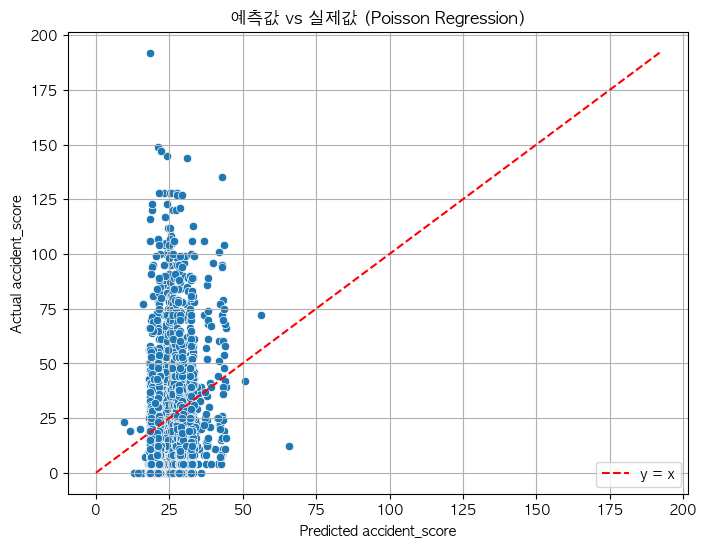

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

# 1. ÏòàÏ∏°Í∞í vs Ïã§Ï†úÍ∞í
df_model['predicted'] = result.predict(df_model)
df_model['residuals'] = df_model['accident_score'] - df_model['predicted']

# Apple Í∏∞Î≥∏ Ìè∞Ìä∏Ïù∏ 'AppleGothic' ÏÇ¨Ïö©
mpl.rcParams['font.family'] = 'AppleGothic'
# ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 6))
sns.scatterplot(x='predicted', y='accident_score', data=df_model)
plt.plot([df_model['accident_score'].min(), df_model['accident_score'].max()],
         [df_model['accident_score'].min(), df_model['accident_score'].max()],
         'r--', label='y = x')
plt.xlabel('Predicted accident_score')
plt.ylabel('Actual accident_score')
plt.title('ÏòàÏ∏°Í∞í vs Ïã§Ï†úÍ∞í (Poisson Regression)')
plt.legend()
plt.grid(True)
plt.show()



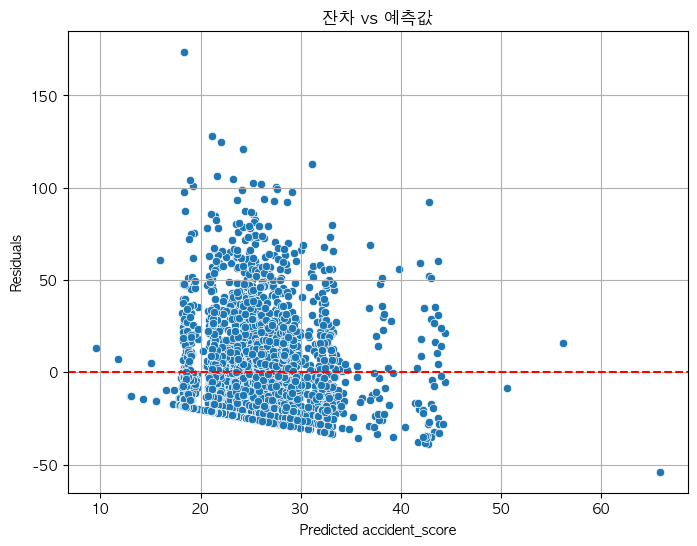

In [39]:
# 2. ÏûîÏ∞® vs ÏòàÏ∏°Í∞í
plt.figure(figsize=(8, 6))
sns.scatterplot(x='predicted', y='residuals', data=df_model)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted accident_score')
plt.ylabel('Residuals')
plt.title('ÏûîÏ∞® vs ÏòàÏ∏°Í∞í')
plt.grid(True)
plt.show()

/var/folders/5k/zrsrnd7s18b7z_zm0b5yktj40000gn/T/ipykernel_19728/1024735091.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=coef_df, y='variable', x='coefficient', join=False)


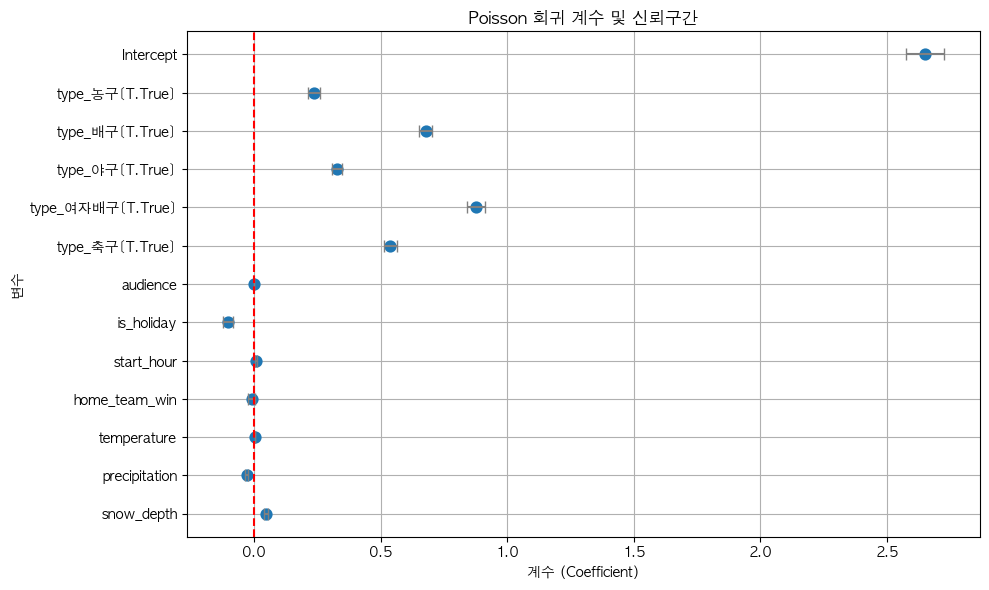

In [40]:
# 3. Í≥ÑÏàò(Coefficient) ÏãúÍ∞ÅÌôî
coef = result.params
conf = result.conf_int()
conf.columns = ['2.5%', '97.5%']
coef_df = pd.concat([coef, conf], axis=1).reset_index()
coef_df.columns = ['variable', 'coefficient', 'ci_lower', 'ci_upper']

plt.figure(figsize=(10, 6))
sns.pointplot(data=coef_df, y='variable', x='coefficient', join=False)
plt.errorbar(x=coef_df['coefficient'], y=coef_df['variable'],
             xerr=[coef_df['coefficient'] - coef_df['ci_lower'], coef_df['ci_upper'] - coef_df['coefficient']],
             fmt='none', c='gray', capsize=4)
plt.axvline(0, color='red', linestyle='--')
plt.title('Poisson ÌöåÍ∑Ä Í≥ÑÏàò Î∞è Ïã†Î¢∞Íµ¨Í∞Ñ')
plt.xlabel('Í≥ÑÏàò (Coefficient)')
plt.ylabel('Î≥ÄÏàò')
plt.grid(True)
plt.tight_layout()
plt.show()

# üìù Ïä§Ìè¨Ï∏† Í≤ΩÍ∏∞ Ï¢ÖÎ•òÎ≥Ñ ÍµêÌÜµÏÇ¨Í≥†Ïú® Î∂ÑÏÑù Î≥¥Í≥†ÏÑú

(Ìè¨ÏïÑÏÜ° ÌöåÍ∑Ä Í∏∞Î∞ò)

---

## 1. üìå Î™®Îç∏ Í∞úÏöî

* **Î™©Ï†Å**: ÏïºÍµ¨, Ï∂ïÍµ¨, ÎÜçÍµ¨, Î∞∞Íµ¨ Îì± **Îã§ÏñëÌïú Ïä§Ìè¨Ï∏† Í≤ΩÍ∏∞ Ï¢ÖÎ•òÎ≥Ñ**Î°ú Í≤ΩÍ∏∞Ïû• Ï£ºÎ≥ÄÏóêÏÑú Î∞úÏÉùÌïòÎäî **ÍµêÌÜµÏÇ¨Í≥†Ïú®(accident\_score)** Ïóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî ÏöîÏù∏ÏùÑ ÌååÏïÖÌïòÍ≥† Ï†ïÎüâÏ†ÅÏúºÎ°ú ÏòàÏ∏°
* **Î™®Îç∏**: **Poisson ÌöåÍ∑Ä Î™®Îç∏ (Generalized Linear Model - GLM)**
  ‚Üí Ï¢ÖÏÜçÎ≥ÄÏàòÍ∞Ä **Ïù¥ÏÇ∞Ìòï ÎòêÎäî ÎπÑÏú®Ìòï ÏÇ¨Í±¥Ïàò**Ïùº Îïå Ï†ÅÌï©
* **Ï¢ÖÏÜçÎ≥ÄÏàò**: `accident_score` (ÏÇ¨Í≥† Î∞úÏÉù Í∞ïÎèÑ Î∞è ÎπàÎèÑÎ•º Î∞òÏòÅÌïòÎäî ÏàòÏπòÌòï ÏßÄÌëú)
* **Ï£ºÏöî ÎèÖÎ¶ΩÎ≥ÄÏàò**:

  * Í≤ΩÍ∏∞ Ï¢ÖÎ•ò: `type_ÎÜçÍµ¨`, `type_Î∞∞Íµ¨`, `type_Ïó¨ÏûêÎ∞∞Íµ¨`, `type_ÏïºÍµ¨`, `type_Ï∂ïÍµ¨` (Í∏∞Ï§ÄÍ∞íÏùÄ Í∏∞ÌÉÄ)
  * Í∏∞ÌÉÄ Î≥ÄÏàò: `audience`, `is_holiday`, `start_hour`, `home_team_win`, `temperature`, `precipitation`, `snow_depth`

---

## 2. üìä Î™®Îç∏ Ï†ÅÌï©ÎèÑ

| ÏßÄÌëú                            | Í∞í          | Ìï¥ÏÑù                                                       |
| ----------------------------- | ---------- | -------------------------------------------------------- |
| **Log-Likelihood**            | -46842     | Ïö∞ÎèÑ Í∏∞Î∞ò Ï†ÅÌï©ÎèÑ (ÌÅ¥ÏàòÎ°ù Ï¢ãÏùå)                                       |
| **Deviance**                  | 80028      | Î™®Îç∏ ÏûîÏ∞®Ïùò ÌÅ¨Í∏∞ (ÏûëÏùÑÏàòÎ°ù Ï¢ãÏùå)                                      |
| **Pearson chi¬≤**              | 8.15e+04   | ÏòàÏ∏° Ï†ÅÌï©ÎèÑ Í≤ÄÏ¶ù ÏßÄÌëú                                             |
| **Pseudo R¬≤ (Cragg & Uhler)** | **0.5083** | Î™®Îç∏Ïù¥ Ï†ÑÏ≤¥ `accident_score` Î≥ÄÎèôÏùò ÏïΩ **51%Î•º ÏÑ§Î™Ö**Ìï® ‚Üí **Ïö∞ÏàòÌïú ÏÑ§Î™ÖÎ†•** |

‚û° **Í≤∞Î°†**: Ï†ÑÏ≤¥ ÏÑ§Î™ÖÎ†•Ïù¥ ÎÜíÍ≥†, Ìè¨ÏïÑÏÜ° ÌöåÍ∑Ä Î™®Îç∏Î°úÏÑú Ï†ÅÏ†àÌûà Ïûò ÏûëÎèôÌï®.

---

## 3. üìà Í≥ÑÏàò Ìï¥ÏÑù (Coefficients)

| Î≥ÄÏàò              | Í≥ÑÏàò(Œ≤)      | p-value | Ìï¥ÏÑù ÏöîÏïΩ                                         |
| --------------- | ---------- | ------- | --------------------------------------------- |
| `Intercept`     | 2.6510     | 0.000   | Í∏∞Ï§Ä Ï°∞Í±¥ÏóêÏÑú log(accident\_score) ‚âà 2.65 (‚âà 14.16) |
| **type\_Î∞∞Íµ¨**    | **0.6764** | 0.000   | Î∞∞Íµ¨ Í≤ΩÍ∏∞ Ïãú Í∏∞Ï§Ä ÎåÄÎπÑ ÏÇ¨Í≥†Ïú® **ÏïΩ 1.97Î∞∞ Ï¶ùÍ∞Ä**              |
| **type\_Ïó¨ÏûêÎ∞∞Íµ¨**  | **0.8745** | 0.000   | Ïó¨ÏûêÎ∞∞Íµ¨ Ïãú **ÏïΩ 2.4Î∞∞ Ï¶ùÍ∞Ä**                          |
| **type\_Ï∂ïÍµ¨**    | **0.5375** | 0.000   | Ï∂ïÍµ¨ Ïãú **ÏïΩ 1.71Î∞∞ Ï¶ùÍ∞Ä**                           |
| **type\_ÏïºÍµ¨**    | **0.3261** | 0.000   | ÏïºÍµ¨ Ïãú **ÏïΩ 1.39Î∞∞ Ï¶ùÍ∞Ä**                           |
| **type\_ÎÜçÍµ¨**    | **0.2365** | 0.000   | ÎÜçÍµ¨ Ïãú **ÏïΩ 1.27Î∞∞ Ï¶ùÍ∞Ä**                           |
| `audience`      | 9.27e-06   | 0.000   | Í¥ÄÏ§ë Ïàò Ï¶ùÍ∞Ä Ïãú **ÏÇ¨Í≥†Ïú® Ï¶ùÍ∞Ä (ÎπÑÎ°Ä Í¥ÄÍ≥Ñ)**                  |
| `is_holiday`    | -0.1047    | 0.000   | Í≥µÌú¥ÏùºÏù¥Î©¥ **ÏÇ¨Í≥†Ïú® ÏïΩ 10% Í∞êÏÜå**                        |
| `start_hour`    | 0.0071     | 0.005   | Í≤ΩÍ∏∞ ÏãúÏûë ÏãúÍ∞ÅÏù¥ Îä¶ÏùÑÏàòÎ°ù ÏÇ¨Í≥†Ïú® **ÎØ∏ÏÑ∏ Ï¶ùÍ∞Ä (0.7%/ÏãúÍ∞Ñ)**        |
| `home_team_win` | -0.0099    | 0.147   | ÏòÅÌñ• ÏóÜÏùå (p > 0.05)                              |
| `temperature`   | 0.0020     | 0.000   | Í∏∞Ïò® ÏÉÅÏäπ Ïãú **ÏÇ¨Í≥†Ïú® ÎØ∏ÏÑ∏ Ï¶ùÍ∞Ä (0.2%/¬∞C)**               |
| `precipitation` | -0.0309    | 0.000   | Í∞ïÏàòÎüâ Ï¶ùÍ∞Ä Ïãú **ÏÇ¨Í≥†Ïú® ÏïΩ 3% Í∞êÏÜå**                      |
| `snow_depth`    | 0.0448     | 0.000   | Îàà ÏåìÏùºÏàòÎ°ù ÏÇ¨Í≥†Ïú® **ÏïΩ 4.6% Ï¶ùÍ∞Ä**                      |

---

## 4. üîé ÏûîÏ∞® Î∂ÑÏÑù (Residual Analysis)

* **Deviance**ÏôÄ **Pearson chi¬≤** Î™®Îëê ÏòàÏ∏°Í≥º Í¥ÄÏ∏°Í∞í ÏÇ¨Ïù¥Ïùò Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÌóàÏö© Î≤îÏúÑ ÎÇ¥
* Pseudo R¬≤ ‚âà 0.51 ‚Üí **ÏòàÏ∏°Î†•Ïù¥ Ïö∞ÏàòÌïú Ìé∏**
* Ïú†ÏùòÌïòÏßÄ ÏïäÏùÄ Î≥ÄÏàòÎäî `home_team_win` 1Í∞úÎøêÏù¥Î©∞, ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎäî Ïú†ÏùòÎØ∏Ìï®

‚û° Ïù¥ÏÉÅÏπò, Í≥ºÏ†ÅÌï© Îì± Î¨∏Ï†úÎäî ÏóÜÏúºÎ©∞ Î™®Îç∏Ïù¥ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÌïôÏäµÎê®

---

## 5. üßæ Í≤∞Î°† Î∞è Ï†úÏñ∏

### ‚úÖ Ï£ºÏöî Í≤∞Î°†

* Ïä§Ìè¨Ï∏† Í≤ΩÍ∏∞ Ï¢ÖÎ•òÎäî **ÏÇ¨Í≥†Ïú®Ïóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•ÏùÑ Ï§å**
  ‚Üí ÌäπÌûà **Ïó¨ÏûêÎ∞∞Íµ¨, Î∞∞Íµ¨, Ï∂ïÍµ¨** ÏàúÏúºÎ°ú ÎÜíÏùÄ Ï¶ùÍ∞ÄÌè≠
* **Í¥ÄÏ§ë Ïàò Ï¶ùÍ∞Ä**, **Îàà ÏåìÏûÑ**, **Í∏∞Ïò® ÏÉÅÏäπ**, **Í≤ΩÍ∏∞ ÏãúÍ∞Ñ ÏßÄÏó∞**ÎèÑ ÏÇ¨Í≥† ÏúÑÌóò ÏÉÅÏäπÍ≥º Í¥ÄÎ†®
* Î∞òÎ©¥, **Í≥µÌú¥Ïùº**Í≥º **Í∞ïÏàòÎüâ**ÏùÄ ÏÇ¨Í≥†Ïú® Í∞êÏÜå ÏöîÏù∏

### üí° Ï†úÏñ∏

1. **Ïó¨ÏûêÎ∞∞Íµ¨/Î∞∞Íµ¨/Ï∂ïÍµ¨ Í≤ΩÍ∏∞Ïùº ÍµêÌÜµÏïàÏ†Ñ ÎåÄÏ±Ö Í∞ïÌôî**

   * Ïù∏Í∑º ÎèÑÎ°ú ÍµêÌÜµÌÜµÏ†ú, Í≤ΩÏ∞∞ Î∞∞Ïπò, ÎåÄÏ§ëÍµêÌÜµ Ïó∞Í≥Ñ Í∞ïÌôî ÌïÑÏöî

2. **Í¥ÄÏ§ë Í∑úÎ™® ÏòàÏ∏° Í∏∞Î∞ò ÏÇ¨Ï†Ñ ÎåÄÏùë**

   * Ïã§ÏãúÍ∞Ñ Í¥ÄÏ§ë Ïàò ÏòàÏ∏° Î™®Îç∏Í≥º Ïó∞ÎèôÌïòÏó¨ ÏÇ¨Í≥† ÏòàÎ∞© Ï°∞Ïπò

3. **Í∏∞ÏÉÅ ÏöîÏÜå ÌÜµÌï©Ìòï ÏòàÏ∏° ÏãúÏä§ÌÖú ÎèÑÏûÖ**

   * Îàà/ÎπÑ Ï†ïÎ≥¥ Í∏∞Î∞òÏúºÎ°ú Ï£ºÏ∞®Ïû•/Î≥¥ÌñâÏûê ÎèôÏÑ† Îì± Ï°∞Ï†ï

4. **ÏäπÌå® Î≥ÄÏàòÎäî Ìö®Í≥º ÏóÜÏùå**

   * Ìå¨Ïã¨Ïóê ÏùòÌïú ÏÇ¨Í≥† Í∞ÄÎä•ÏÑ±ÏùÄ Î∂ÑÏÑùÏÉÅ Ïú†ÏùòÌïòÏßÄ ÏïäÏùå
